In [1]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks, hough_circle,hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data, img_as_float
import matplotlib.pyplot as pylab
from matplotlib import cm
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

C:\Users\vuklu\AppData\Local\Temp\ipykernel_20144\1360767866.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
C:\Users\vuklu\AppData\Local\Temp\ipykernel_20144\1360767866.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)


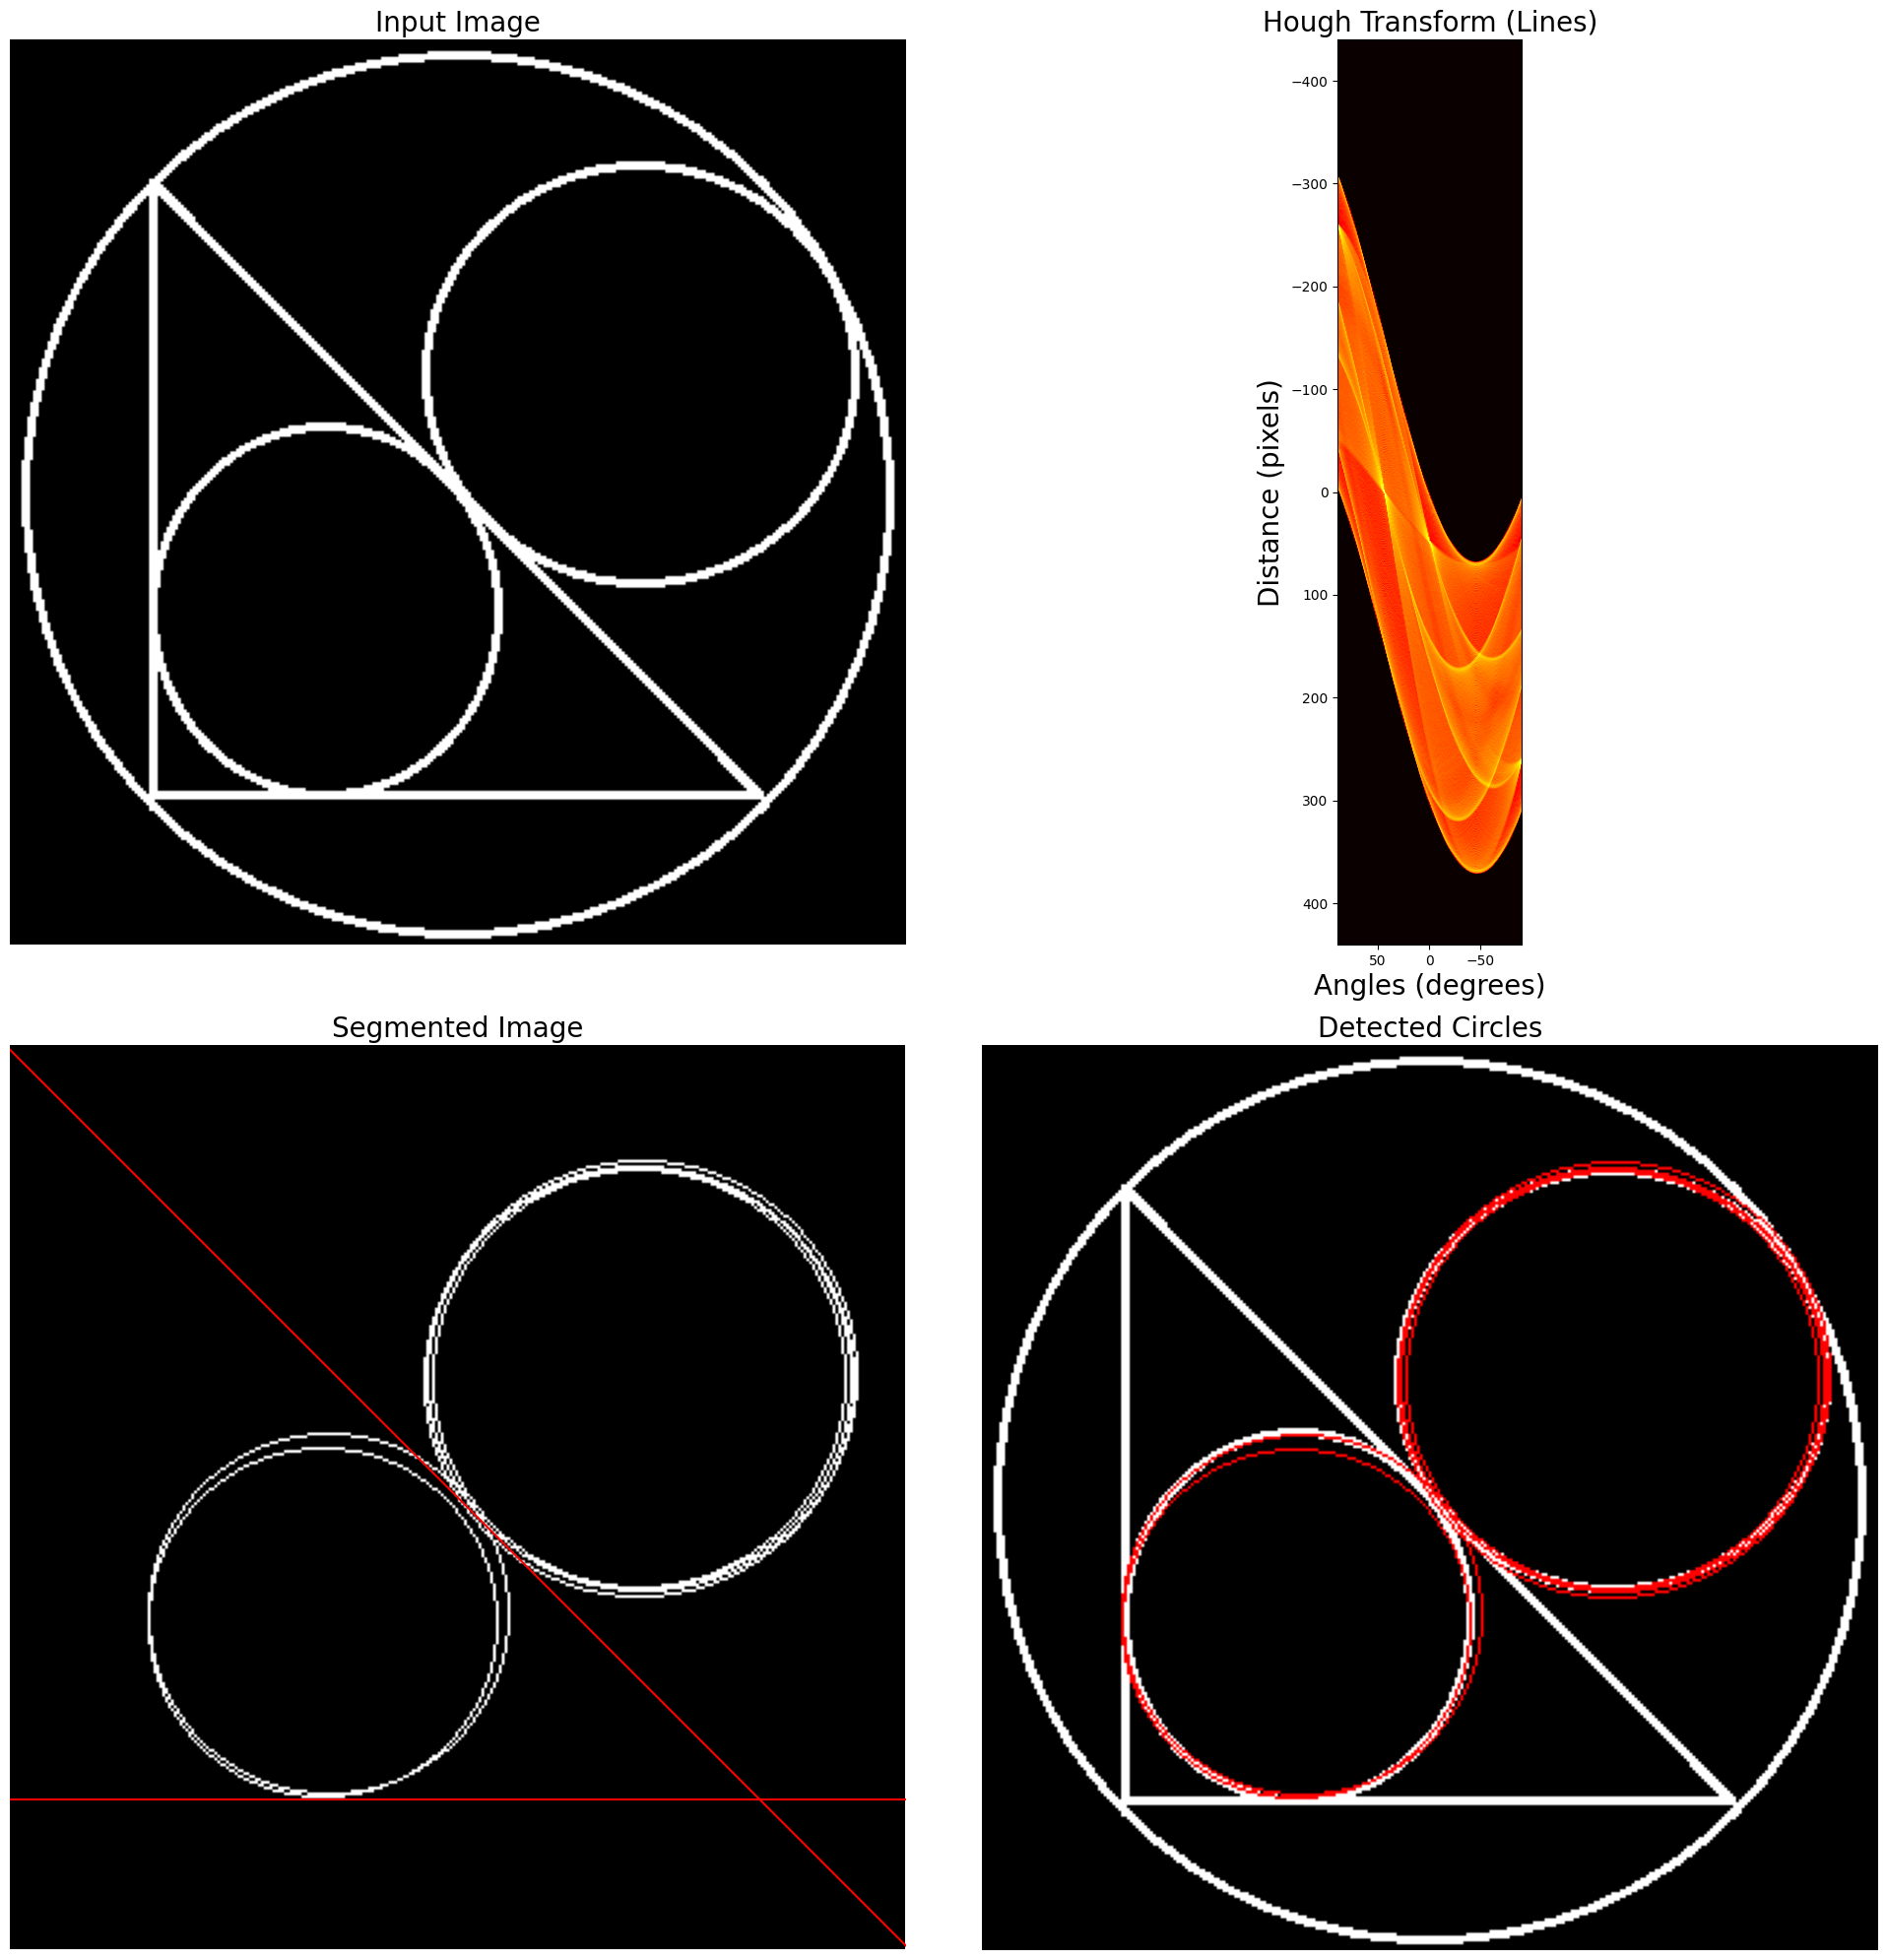

In [3]:
# Đọc ảnh từ file
image = imread('images/triangle_circle.png')

# Kiểm tra xem ảnh có kênh Alpha (4 kênh), và nếu có, chỉ giữ lại 3 kênh đầu tiên (RGB)
if image.shape[2] == 4:
    image = image[..., :3]

# Chuyển đổi ảnh RGB thành ảnh xám
image = rgb2gray(image)

# Thực hiện phép biến đổi Hough cho đường thẳng
h, theta, d = hough_line(image)

# Tạo một figure với 2x2 khung
fig, axes = pylab.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()

# Hiển thị ảnh gốc trên khung đầu tiên
axes[0].imshow(image, cmap=cm.gray)
axes[0].set_title('Input Image', size=20)
axes[0].set_axis_off()

# Hiển thị kết quả của phép biến đổi Hough cho đường thẳng
axes[1].imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
               cmap=cm.hot, aspect=1/1.5)
axes[1].set_title('Hough Transform (Lines)', size=20)
axes[1].set_xlabel('Angles (degrees)', size=20)
axes[1].set_ylabel('Distance (pixels)', size=20)
axes[1].axis('image')

# Hiển thị các đường thẳng đã phát hiện trên ảnh gốc
axes[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    axes[2].plot((0, image.shape[1]), (y0, y1), '-r')
axes[2].set_xlim((0, image.shape[1]))
axes[2].set_ylim((image.shape[0], 0))
axes[2].set_axis_off()
axes[2].set_title('Detected Lines', size=20)

# Thực hiện phép biến đổi Hough cho hình tròn
hough_radii = np.arange(50, 100, 2)
hough_res = hough_circle(image, hough_radii)

# Chọn ra 6 hình tròn nổi bật nhất
accums, c_x, c_y, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=6)

# Tạo ảnh RGB để vẽ các hình tròn đã phát hiện
image_rgb = gray2rgb(image)
segmented_image = np.zeros_like(image)

# Vẽ các hình tròn đã phát hiện trên ảnh
for center_y, center_x, radius in zip(c_y, c_x, radii):
    circ_y, circ_x = circle_perimeter(center_y, center_x, radius)
    image_rgb[circ_y, circ_x] = (1, 0, 0)  # Màu đỏ cho các hình tròn đã phát hiện
    segmented_image[circ_y, circ_x] = 1  # Đánh dấu trên ảnh phân đoạn

# Hiển thị các hình tròn đã phát hiện trên ảnh RGB
axes[3].imshow(image_rgb)
axes[3].set_axis_off()
axes[3].set_title('Detected Circles', size=20)

# Hiển thị ảnh phân đoạn chứa các hình tròn đã phát hiện
axes[2].imshow(segmented_image, cmap=cm.gray)
axes[2].set_axis_off()
axes[2].set_title('Segmented Image', size=20)

# Điều chỉnh bố cục và hiển thị hình
pylab.tight_layout()
pylab.axis('off')
pylab.show()


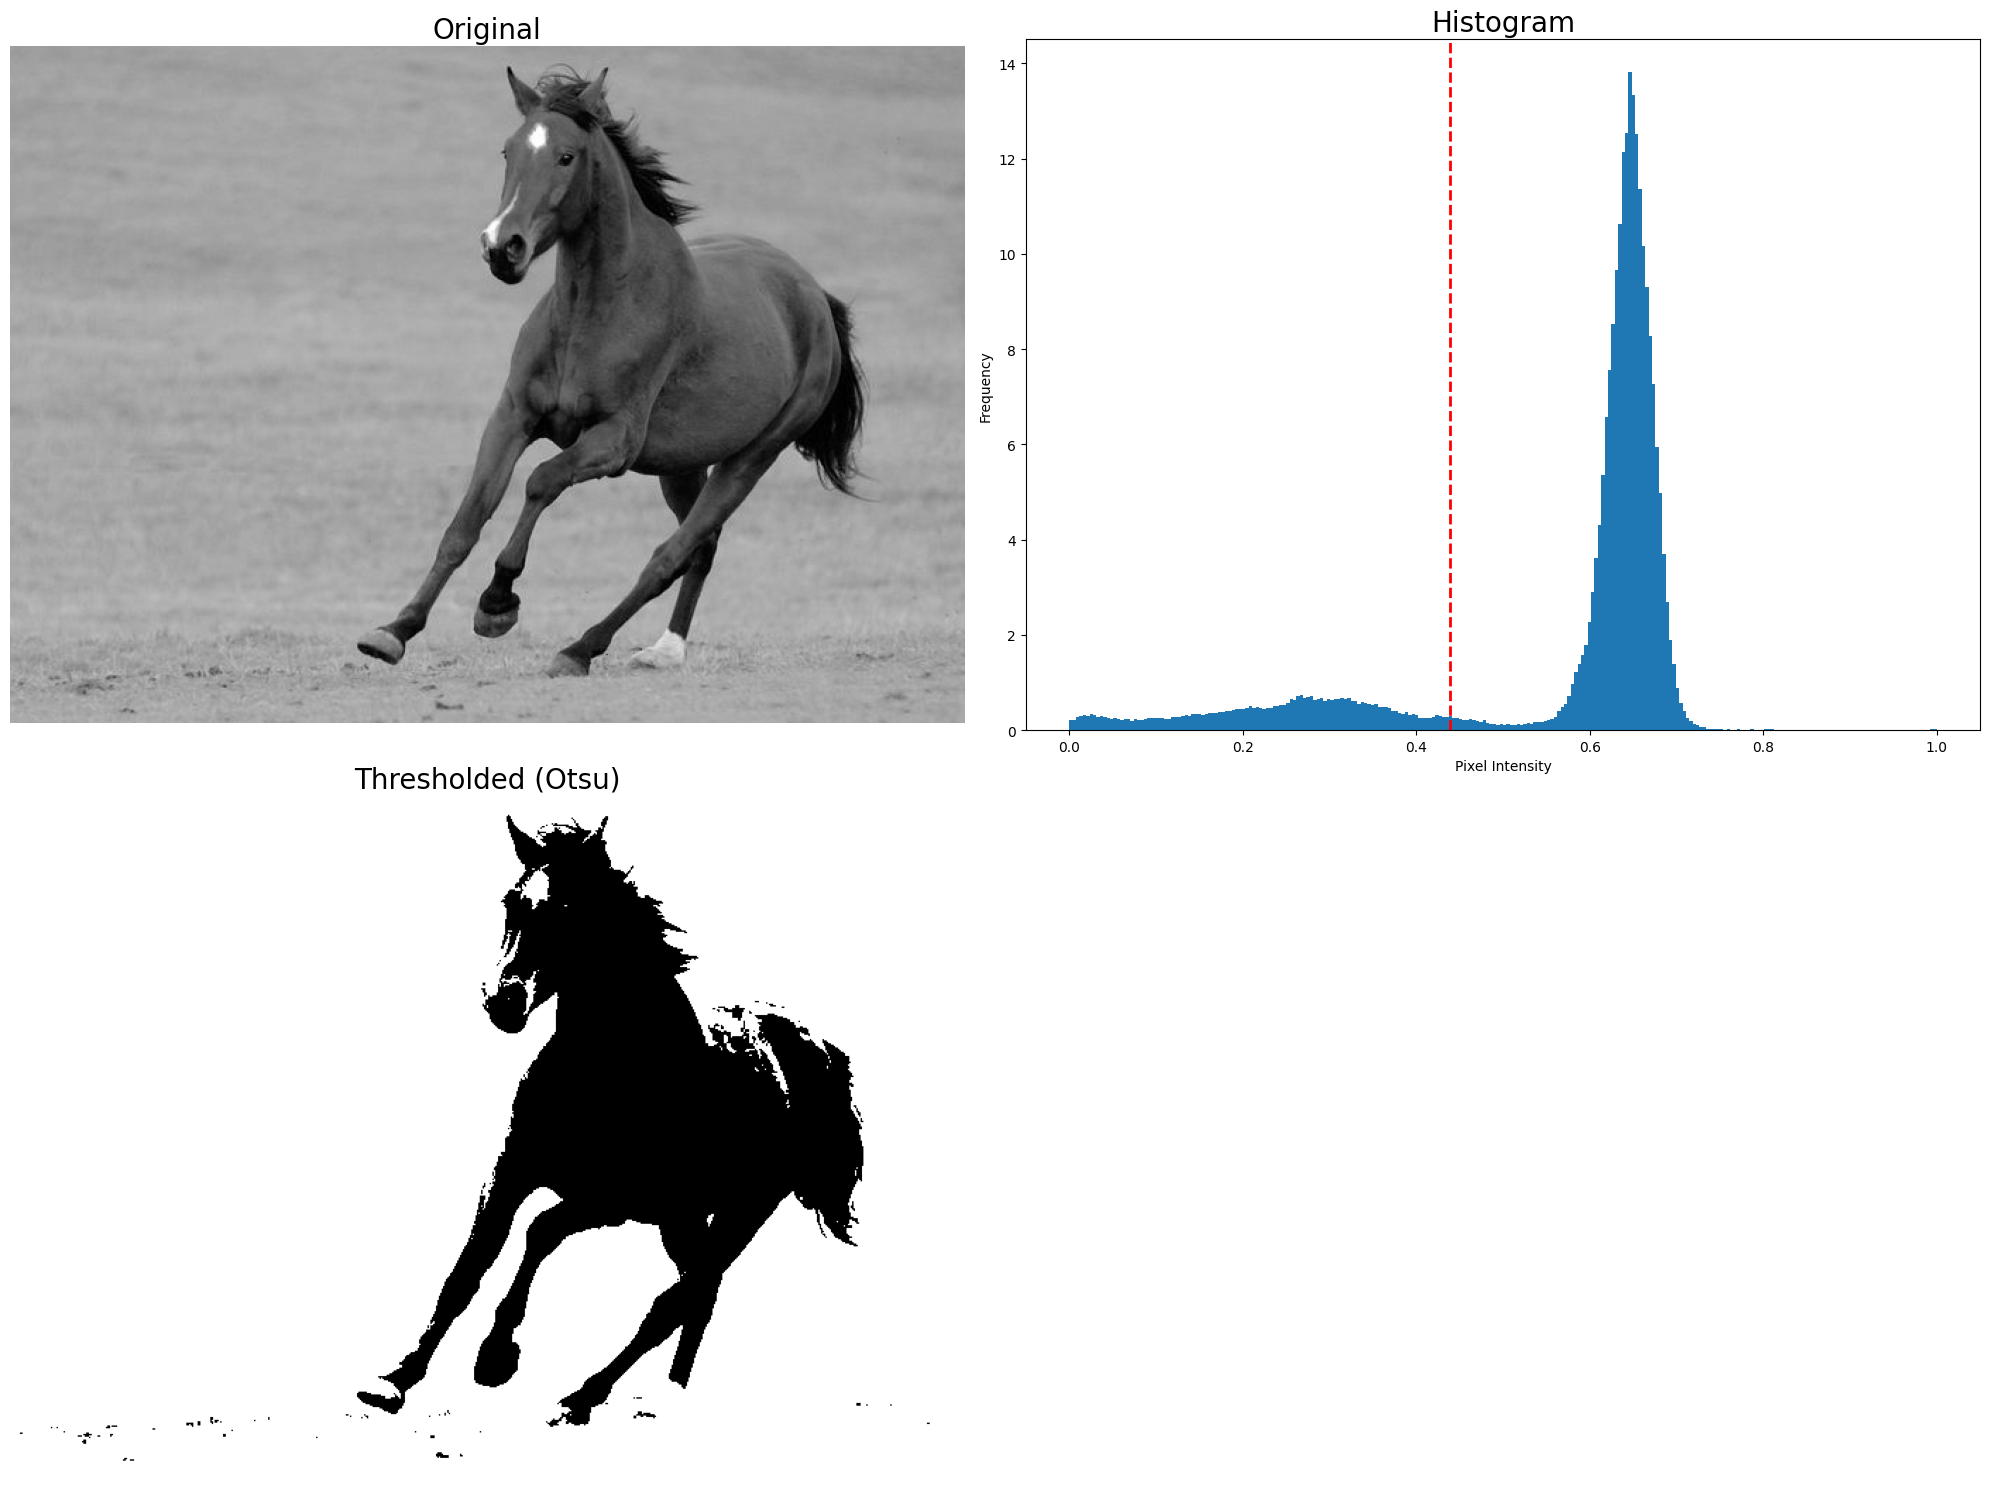

In [ ]:
# Đọc ảnh và chuyển đổi sang ảnh xám
image = rgb2gray(imread('images/horse.jpg'))

# Tính ngưỡng Otsu để phân đoạn ảnh thành hai vùng: foreground và background
thresh = threshold_otsu(image)

# Tạo ảnh nhị phân bằng cách áp dụng ngưỡng Otsu
binary = image > thresh

# Tạo một figure với 2x2 khung để hiển thị các kết quả
fig, axes = pylab.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.ravel()  # Chuyển đổi mảng axes thành một mảng 1 chiều để dễ truy cập

# Hiển thị ảnh gốc trên khung đầu tiên
axes[0].imshow(image, cmap=pylab.cm.gray)
axes[0].set_title('Original', size=20)
axes[0].axis('off')

# Hiển thị histogram của ảnh gốc và vẽ đường ngưỡng Otsu trên histogram
axes[1].hist(image.ravel(), bins=256, density=True)  # `density=True` thay cho `normed=True`
axes[1].set_title('Histogram', size=20)
axes[1].axvline(thresh, color='r', linestyle='--', linewidth=2)  # Đường ngưỡng Otsu màu đỏ
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')

# Hiển thị ảnh nhị phân sau khi áp dụng ngưỡng Otsu
axes[2].imshow(binary, cmap=pylab.cm.gray)
axes[2].set_title('Thresholded (Otsu)', size=20)
axes[2].axis('off')

# Tắt trục tọa độ cho khung cuối cùng để trống hoặc thêm nội dung khác nếu cần
axes[3].axis('off')

# Điều chỉnh bố cục để tránh chồng chéo giữa các khung và hiển thị hình
pylab.tight_layout()
pylab.show()


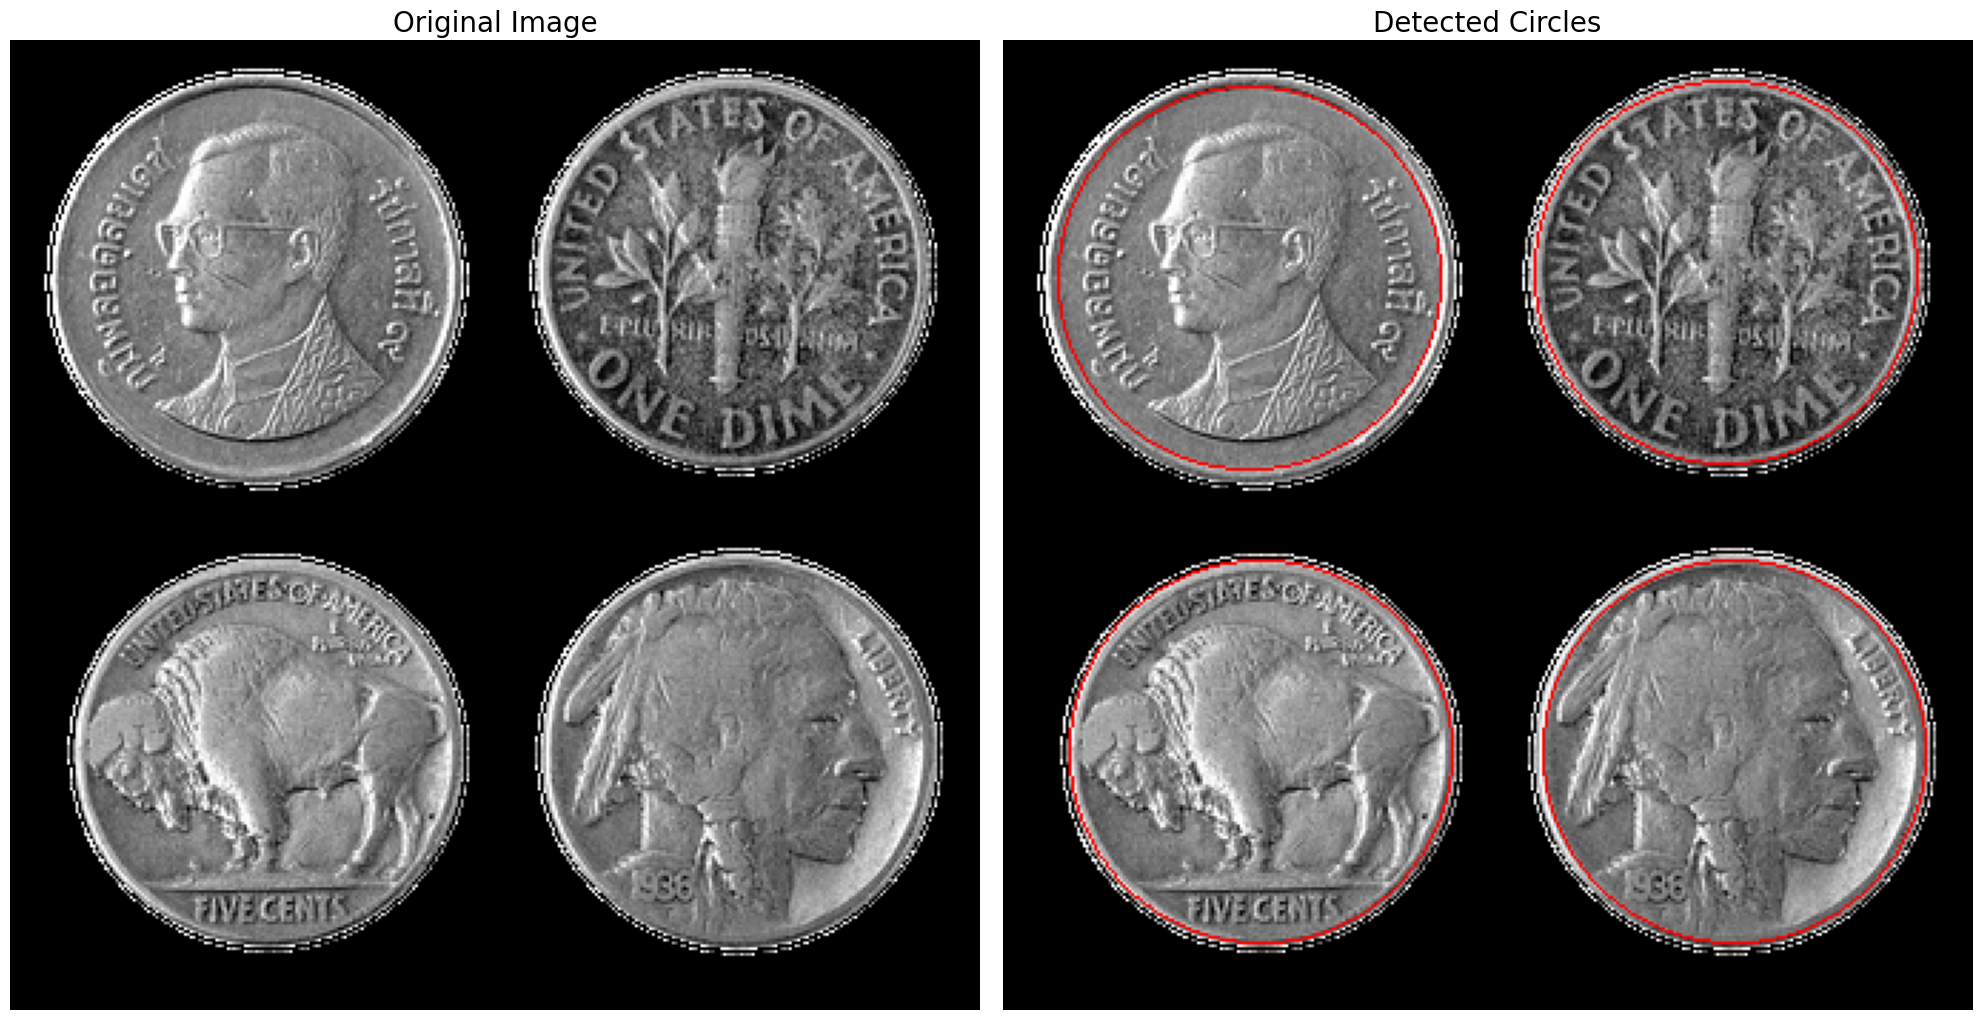

In [6]:
# Đọc ảnh từ file
image = imread('images/coins.png')

# Kiểm tra nếu ảnh có kênh Alpha (4 kênh) và chỉ giữ lại 3 kênh đầu tiên (RGB) nếu có
if image.shape[2] == 4:
    image = image[..., :3]

# Chuyển đổi ảnh RGB sang ảnh xám
image = rgb2gray(image)

# Tạo một figure với hai khung để hiển thị ảnh gốc và ảnh với các hình tròn đã phát hiện
fig, axes = pylab.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.ravel()  # Chuyển đổi mảng axes thành một mảng 1 chiều để dễ truy cập

# Hiển thị ảnh gốc trên khung đầu tiên
axes[0].imshow(image, cmap=pylab.cm.gray)
axes[0].set_axis_off()
axes[0].set_title('Original Image', size=20)

# Thiết lập các bán kính cho biến đổi Hough để tìm kiếm các hình tròn
hough_radii = np.arange(65, 75, 1)

# Thực hiện phép biến đổi Hough cho hình tròn
hough_res = hough_circle(image, hough_radii)

# Chọn ra 4 hình tròn nổi bật nhất từ kết quả của biến đổi Hough
accums, c_x, c_y, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=4)

# Chuyển ảnh xám sang RGB để có thể vẽ các hình tròn với màu sắc
image_rgb = gray2rgb(image)

# Vẽ các hình tròn đã phát hiện trên ảnh RGB
for center_y, center_x, radius in zip(c_y, c_x, radii):
    # Tạo đường viền cho hình tròn tại mỗi tâm và bán kính đã phát hiện
    circ_y, circ_x = circle_perimeter(center_y, center_x, radius)
    # Đánh dấu đường viền hình tròn trên ảnh RGB với màu đỏ
    image_rgb[circ_y, circ_x] = (1, 0, 0)  # Màu đỏ cho các hình tròn đã phát hiện

# Hiển thị ảnh với các hình tròn đã phát hiện trên khung thứ hai
axes[1].imshow(image_rgb)
axes[1].set_axis_off()
axes[1].set_title('Detected Circles', size=20)

# Điều chỉnh bố cục và hiển thị hình
pylab.tight_layout()
pylab.show()


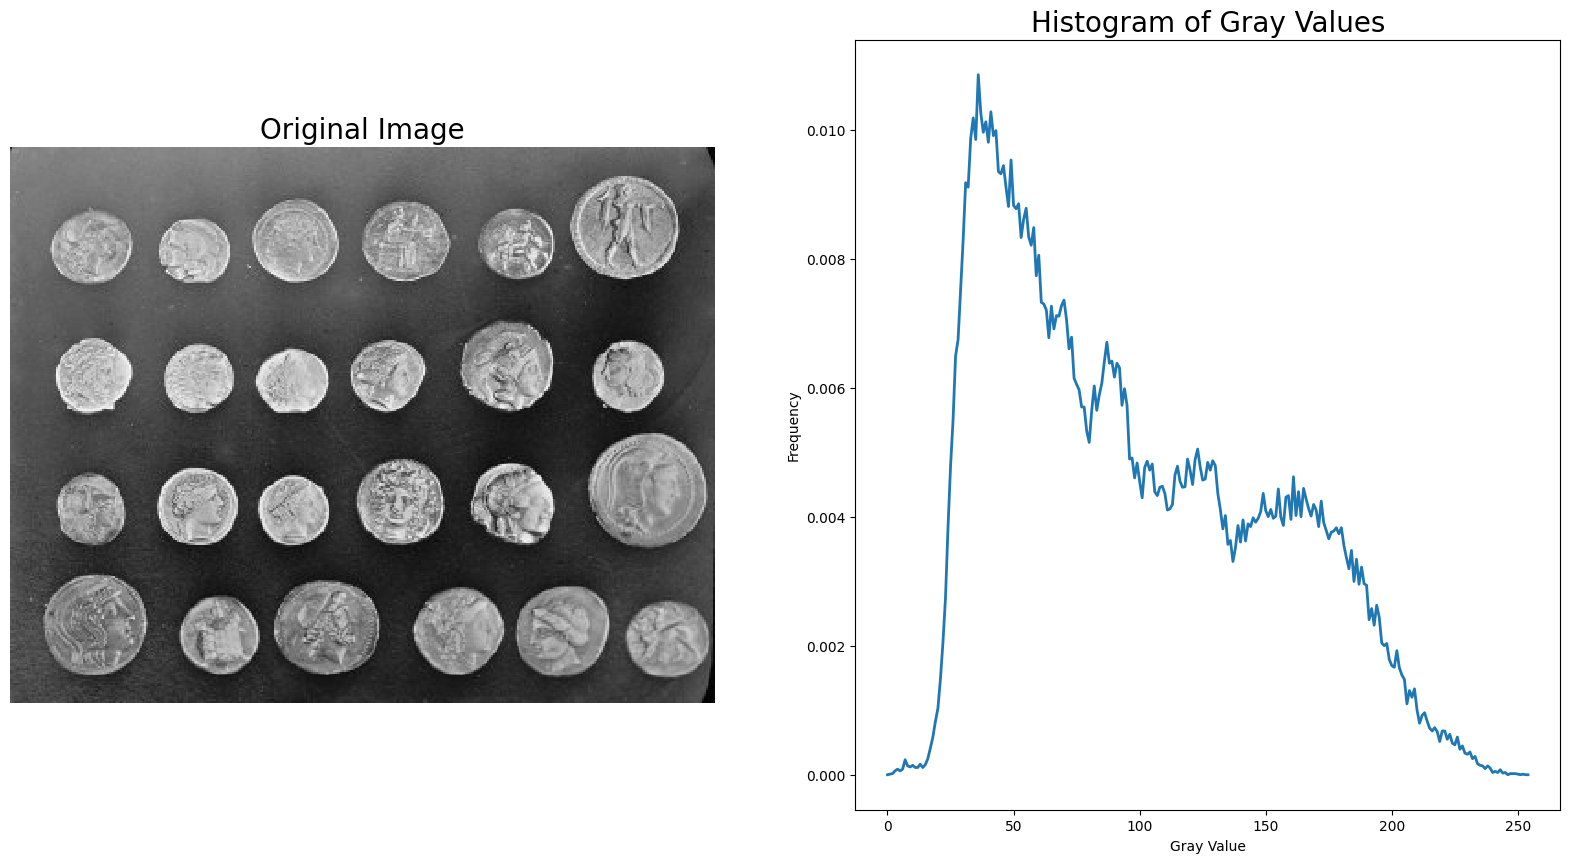

In [7]:
# Lấy ảnh mẫu "coins" từ thư viện skimage
coins = data.coins()

# Tính histogram của ảnh với các giá trị xám (gray values)
# `bins=np.arange(0, 256)`: tạo 256 bin cho các giá trị từ 0 đến 255
# `density=True`: chuẩn hóa histogram để tổng diện tích bằng 1 (thay cho `normed=True`, đã lỗi thời)
hist = np.histogram(coins, bins=np.arange(0, 256), density=True)

# Tạo một figure với hai khung để hiển thị ảnh và histogram
fig, axes = pylab.subplots(1, 2, figsize=(20, 10))

# Hiển thị ảnh gốc với colormap xám (gray) và tắt trục tọa độ
axes[0].imshow(coins, cmap=pylab.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[0].set_title('Original Image', size=20)

# Hiển thị histogram của các giá trị xám
# `hist[1][:-1]`: các giá trị bin của histogram (loại bỏ phần tử cuối vì np.histogram tạo thêm một bin)
# `hist[0]`: giá trị tần suất của các bin
axes[1].plot(hist[1][:-1], hist[0], lw=2)  # `lw=2`: độ dày của đường histogram
axes[1].set_title('Histogram of Gray Values', size=20)
axes[1].set_xlabel('Gray Value')
axes[1].set_ylabel('Frequency')

# Hiển thị toàn bộ hình
pylab.show()


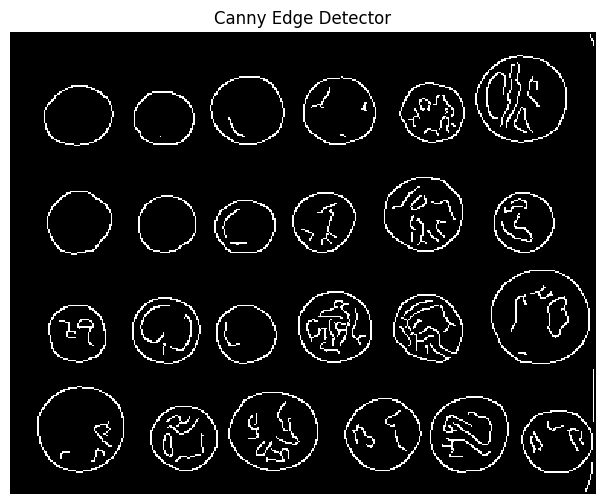

In [8]:
# Lấy ảnh mẫu "coins" từ thư viện skimage
coins = data.coins()

# Áp dụng bộ lọc Canny để phát hiện các cạnh trong ảnh
# `sigma=2`: Độ lệch chuẩn của Gaussian cho làm mịn ảnh, giúp giảm nhiễu
edges = canny(coins, sigma=2)

# Tạo một figure để hiển thị ảnh với các cạnh đã phát hiện
fig, axes = pylab.subplots(figsize=(10, 6))

# Hiển thị ảnh cạnh sau khi áp dụng Canny với colormap xám
axes.imshow(edges, cmap=pylab.cm.gray, interpolation='nearest')

# Thiết lập tiêu đề và tắt trục tọa độ
axes.set_title('Canny Edge Detector')
axes.axis('off')

# Hiển thị hình
pylab.show()


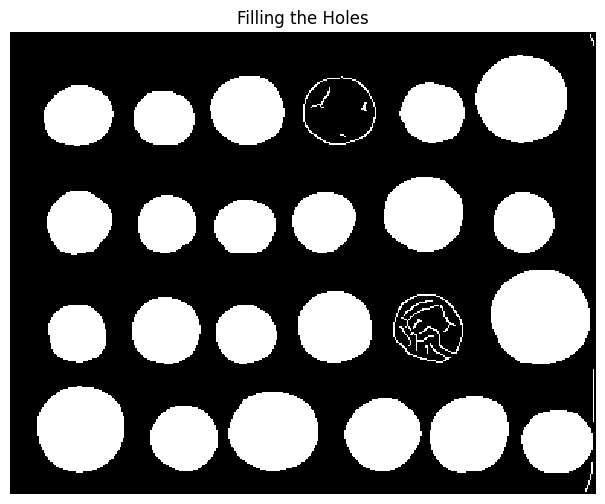

In [9]:
from scipy import ndimage as ndi

# Sử dụng phép toán điền lỗ để lấp đầy các vùng bên trong các cạnh đã phát hiện
# `binary_fill_holes` lấp đầy tất cả các vùng đen (0) được bao quanh bởi các vùng trắng (1)
fill_coins = ndi.binary_fill_holes(edges)

# Tạo một figure để hiển thị kết quả sau khi lấp đầy các vùng bên trong
fig, axes = pylab.subplots(figsize=(10, 6))

# Hiển thị ảnh với các vùng đã được lấp đầy
axes.imshow(fill_coins, cmap=pylab.cm.gray, interpolation='nearest')

# Thiết lập tiêu đề và tắt trục tọa độ
axes.set_title('Filling the Holes')
axes.axis('off')

# Hiển thị hình
pylab.show()


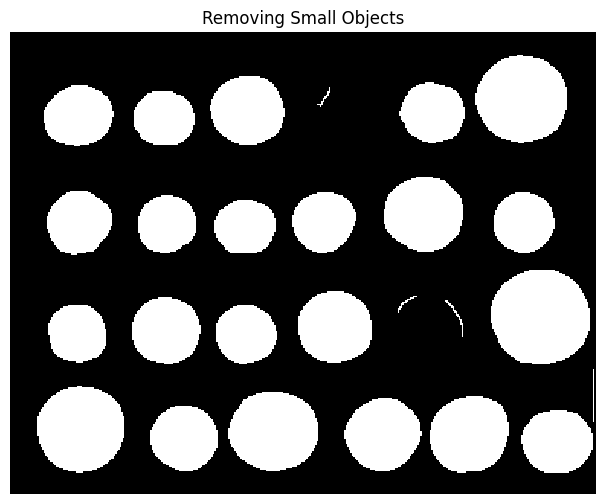

In [10]:
from skimage import morphology

# Loại bỏ các đối tượng nhỏ trong ảnh nhị phân
# `remove_small_objects`: xóa các vùng có diện tích nhỏ hơn ngưỡng được chỉ định
# `min_size=21`: chỉ giữ lại các đối tượng có kích thước lớn hơn hoặc bằng 21 pixel
coins_cleaned = morphology.remove_small_objects(fill_coins, min_size=21)

# Tạo một figure để hiển thị kết quả sau khi loại bỏ các đối tượng nhỏ
fig, axes = pylab.subplots(figsize=(10, 6))

# Hiển thị ảnh với các đối tượng nhỏ đã được loại bỏ
axes.imshow(coins_cleaned, cmap=pylab.cm.gray, interpolation='nearest')

# Thiết lập tiêu đề và tắt trục tọa độ
axes.set_title('Removing Small Objects')
axes.axis('off')

# Hiển thị hình
pylab.show()


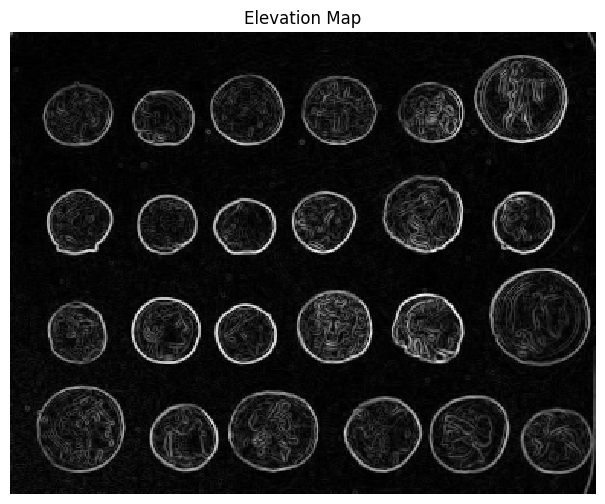

In [11]:
# Tính bản đồ độ cao (elevation map) của ảnh bằng cách sử dụng bộ lọc Sobel
# `sobel(coins)`: tính gradient của ảnh, làm nổi bật các biên và chuyển đổi ảnh thành bản đồ độ cao
elevation_map = sobel(coins)

# Tạo một figure để hiển thị bản đồ độ cao
fig, axes = pylab.subplots(figsize=(10, 6))

# Hiển thị bản đồ độ cao của ảnh
axes.imshow(elevation_map, cmap=pylab.cm.gray, interpolation='nearest')

# Thiết lập tiêu đề và tắt trục tọa độ
axes.set_title('Elevation Map')
axes.axis('off')

# Hiển thị hình
pylab.show()


2 0


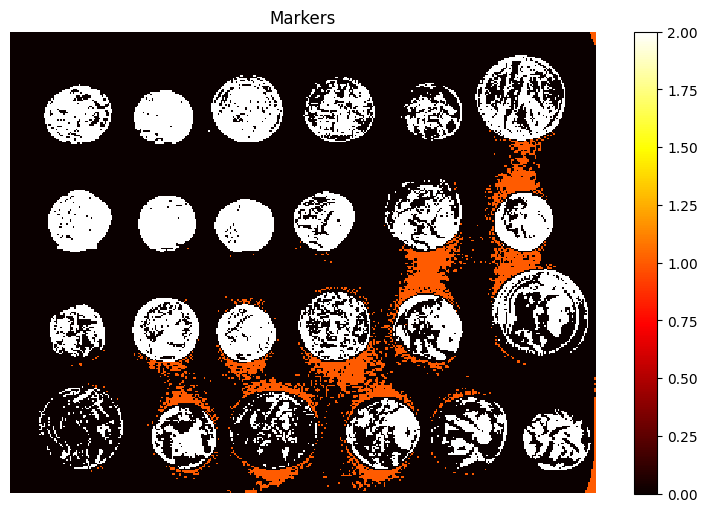

In [14]:
import matplotlib.pyplot as plt  # Thêm dòng này để nhập plt

# Tạo một mảng `markers` có cùng kích thước với ảnh `coins` và chứa toàn các giá trị 0
markers = np.zeros_like(coins)

# Gán các giá trị cho các vùng của mảng `markers` để tạo điểm đánh dấu
# Vùng có giá trị xám dưới 30 (vùng tối nhất) được đánh dấu là 1 (ví dụ: nền)
markers[coins < 30] = 1

# Vùng có giá trị xám trên 150 (vùng sáng nhất) được đánh dấu là 2 (ví dụ: tiền xu)
markers[coins > 150] = 2

# In ra giá trị tối đa và tối thiểu của `markers` để kiểm tra điểm đánh dấu
print(np.max(markers), np.min(markers))  # Sẽ in: 2 và 0, vì chúng ta chỉ có ba mức độ (0, 1, 2)

# Tạo một figure để hiển thị ảnh với các điểm đánh dấu
fig, axes = pylab.subplots(figsize=(10, 6))

# Hiển thị mảng `markers` với colormap nóng (`hot`) để dễ nhìn thấy các vùng đã đánh dấu
a = axes.imshow(markers, cmap=plt.cm.hot, interpolation='nearest')

# Thêm thanh màu (colorbar) để hiển thị các giá trị của điểm đánh dấu
plt.colorbar(a)

# Thiết lập tiêu đề và tắt trục tọa độ
axes.set_title('Markers')
axes.axis('off')

# Hiển thị hình
pylab.show()


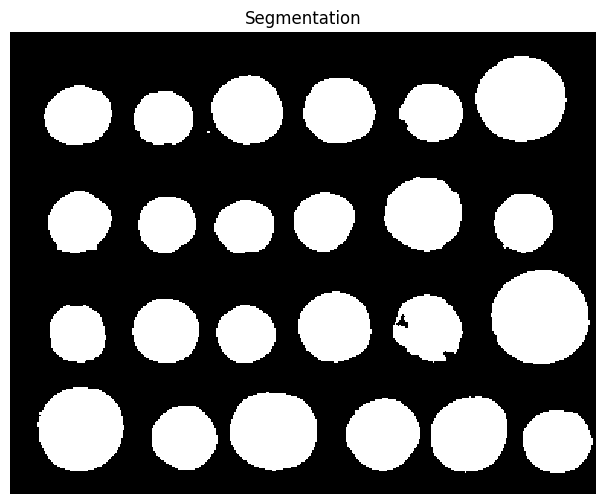

In [18]:
from skimage.segmentation import watershed

# Áp dụng thuật toán phân đoạn Watershed trên bản đồ độ cao `elevation_map`
# `watershed(elevation_map, markers)`: sử dụng bản đồ độ cao và các điểm đánh dấu để phân đoạn ảnh
# `elevation_map`: bản đồ độ cao dùng để xác định các biên
# `markers`: điểm đánh dấu được sử dụng làm nguồn cho vùng phân đoạn
segmentation = watershed(elevation_map, markers)

# Tạo một figure để hiển thị kết quả phân đoạn
fig, axes = pylab.subplots(figsize=(10, 6))

# Hiển thị ảnh sau khi phân đoạn với colormap xám
axes.imshow(segmentation, cmap=pylab.cm.gray, interpolation='nearest')

# Thiết lập tiêu đề và tắt trục tọa độ
axes.set_title('Segmentation')
axes.axis('off')

# Hiển thị hình
pylab.show()


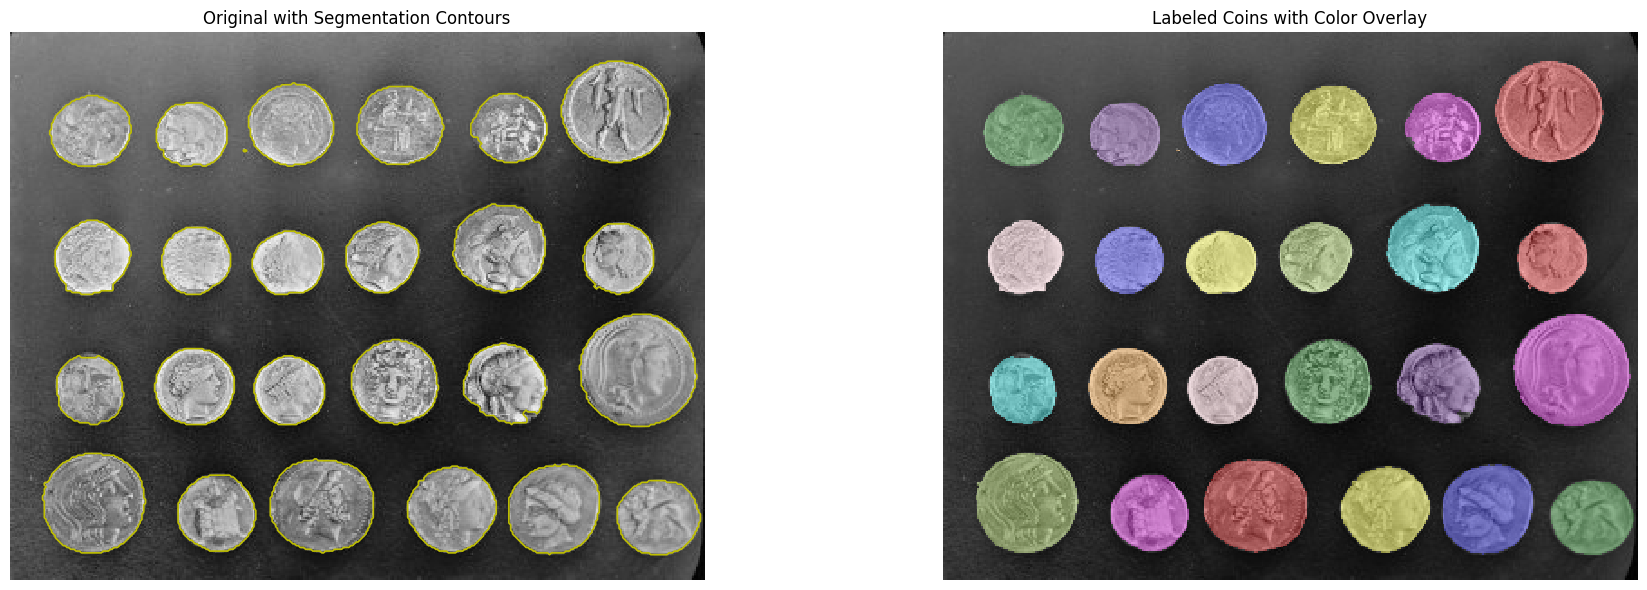

In [ ]:
# Lấp đầy các lỗ trong vùng phân đoạn và điều chỉnh giá trị phân đoạn
# `segmentation - 1`: chuyển các giá trị phân đoạn từ 1 về 0 (nền) và từ 2 về 1 (vùng đối tượng)
# `ndi.binary_fill_holes`: lấp đầy tất cả các vùng trống (lỗ) bên trong các đối tượng
segmentation = ndi.binary_fill_holes(segmentation - 1)

# Gán nhãn cho từng vùng đối tượng trong ảnh phân đoạn
# `ndi.label(segmentation)`: tìm và gán nhãn cho từng vùng kết nối trong ảnh nhị phân đã lấp đầy
# `labeled_coins`: ảnh nhãn, trong đó mỗi đối tượng có một nhãn duy nhất
# `_`: số lượng nhãn (không sử dụng, chỉ lưu kết quả đầu ra)
labeled_coins, _ = ndi.label(segmentation)

# Tạo một ảnh phủ nhãn màu sắc lên trên ảnh gốc để hiển thị các vùng đã phân đoạn
# `label2rgb(labeled_coins, image=coins)`: áp dụng màu sắc cho từng nhãn trong `labeled_coins` 
# và phủ lên `coins`
image_label_overlay = label2rgb(labeled_coins, image=coins)

# Tạo một figure với hai khung để hiển thị ảnh gốc và ảnh phủ nhãn
fig, axes = pylab.subplots(1, 2, figsize=(20, 6), sharey=True)

# Hiển thị ảnh gốc và đường viền phân đoạn
axes[0].imshow(coins, cmap=pylab.cm.gray, interpolation='nearest')
# Vẽ đường viền của phân đoạn (đường bao quanh các đối tượng)
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[0].set_title('Original with Segmentation Contours')

# Hiển thị ảnh với nhãn màu sắc phủ lên trên ảnh gốc
axes[1].imshow(image_label_overlay, interpolation='nearest')
axes[1].set_title('Labeled Coins with Color Overlay')

# Tắt trục tọa độ cho cả hai khung
for a in axes:
    a.axis('off')

# Điều chỉnh bố cục và hiển thị hình
pylab.tight_layout()
pylab.show()
